# Select and superposition anode waveforms 

In [3]:
import pandas as pd
import numpy as np
import analysis_data
def calculate_ch0_mean_std(file, threshold=100, start_index=1000, end_index=None ):
    df = pd.read_hdf(file, key='winfo')
    index = None
    for i in range(3):
        if df.Ch[i] != 0:
            continue
        index = i
    ch_selec = df.Ch == 0
    df = df[ch_selec]
    if 'Wave' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'Wave' column.")
    
    st, ed = analysis_data.find_threshold_points(df.Wave[:][index], df.Baseline[:][index], negative_pulse=True, threshold=threshold, start_index=start_index, end_index=len(df.Wave[:][index]) )
    
    wave_array = df['Wave'].values 
    data_array = np.zeros((len(wave_array), len(wave_array[0])))
    for i in range(len(wave_array)):
        for j in range(len(wave_array[0])):
            data_array[i][j] = wave_array[i][j]        
    mean_array = np.mean(data_array, axis=0)
    std_array = np.std(data_array, axis=0)
    data_array = None
    return mean_array[st-50:ed+50], std_array[st-50:ed+50]

def calculate_ch0_mean_std_0(file, threshold=100, start_index=10, end_index= 500 ):
    df = pd.read_hdf(file, key='winfo')
    index = None
    for i in range(3):
        if df.Ch[i] != 0:
            continue
        index = i
    ch_selec = df.Ch == 0
    df = df[ch_selec]
    if 'Wave' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'Wave' column.")
    
    st, ed = analysis_data.find_threshold_points(df.Wave[:][index], df.Baseline[:][index], negative_pulse=True, threshold=threshold, start_index=start_index, end_index=end_index )
    
    wave_array = df['Wave'].values 
    data_array = np.zeros((len(wave_array), len(wave_array[0])))
    for i in range(len(wave_array)):
        for j in range(len(wave_array[0])):
            data_array[i][j] = wave_array[i][j]     
    mean_array = np.mean(data_array, axis=0)
    std_array = np.std(data_array, axis=0)
    data_array = None
    return mean_array[st-50:ed+50], std_array[st-50:ed+50]

In [4]:
file  = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p9_1p36_5us_run0_raw_b0_seg0.h5py'
mea_5us, std_5us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [69]:
file = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p9_1p36_10us_run0_raw_b0_seg0.h5py'
mea_10us, std_10us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [72]:
file  = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p9_1p36_30us_run0_raw_b0_seg0.h5py'
mea_30us, std_30us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [88]:
file  = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p9_1p36_90us_run0_raw_b0_seg0.h5py'
mea_90us, std_90us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [89]:
file  = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p9_1p36_200us_run0_raw_b0_seg0.h5py'
mea_200us, std_200us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [101]:
file = 'outnpy/lv2415_lv2414_20241114_12DB_LED_1p36_1us_200hz_1p7_run0_raw_b0_seg0.h5py'
mea_ref, std_ref = calculate_ch0_mean_std(file, threshold=100, start_index=10)

In [112]:
file = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p36_1p7_10us_2khz_run0_raw_b0_seg0.h5py'
mea_510us, std_510us = calculate_ch0_mean_std_0(file, threshold=100, start_index=10, end_index=500)

In [109]:

file = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p36_1p7_10us_1khz_run0_raw_b0_seg0.h5py'
mea_1010us, std_1010us = calculate_ch0_mean_std_0(file, threshold=100, start_index=10, end_index=500)

In [110]:
file = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p36_1p7_10us_500hz_run0_raw_b0_seg0.h5py'
mea_2010us, std_2010us = calculate_ch0_mean_std_0(file, threshold=100, start_index=10, end_index=500)
file = 'outnpy/lv2415_lv2414_20241113_12DB_LED_1.6v_900mv_1p36_1p7_10us_200hz_run0_raw_b0_seg0.h5py'
mea_5010us, std_5010us = calculate_ch0_mean_std_0(file, threshold=100, start_index=10, end_index=500)

In [121]:
df = pd.read_hdf(file, key='winfo')
df.head()

,Ch,TTT,Baseline,Area_S1,Area_S2,S1_width,S2_width,Delta_t,Wave
0,0,119652,15169,5138.068028,5103.671376,152,920,510,"[15172, 15173, 15173, 15169, 15172, 15170, 151..."
1,1,119652,15314,3605.230436,314.982885,152,920,510,"[15318, 15312, 15315, 15315, 15317, 15312, 153..."
2,2,119652,8112,-2471.931200,-546.489954,152,920,510,"[8111, 8112, 8117, 8112, 8110, 8112, 8108, 811..."
3,0,244652,15170,5157.171781,5100.553406,152,920,510,"[15175, 15173, 15169, 15173, 15163, 15170, 151..."
4,1,244652,15313,3536.592432,297.437777,152,920,510,"[15310, 15309, 15315, 15311, 15308, 15319, 153..."


/tmp/ipykernel_3821814/842729094.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


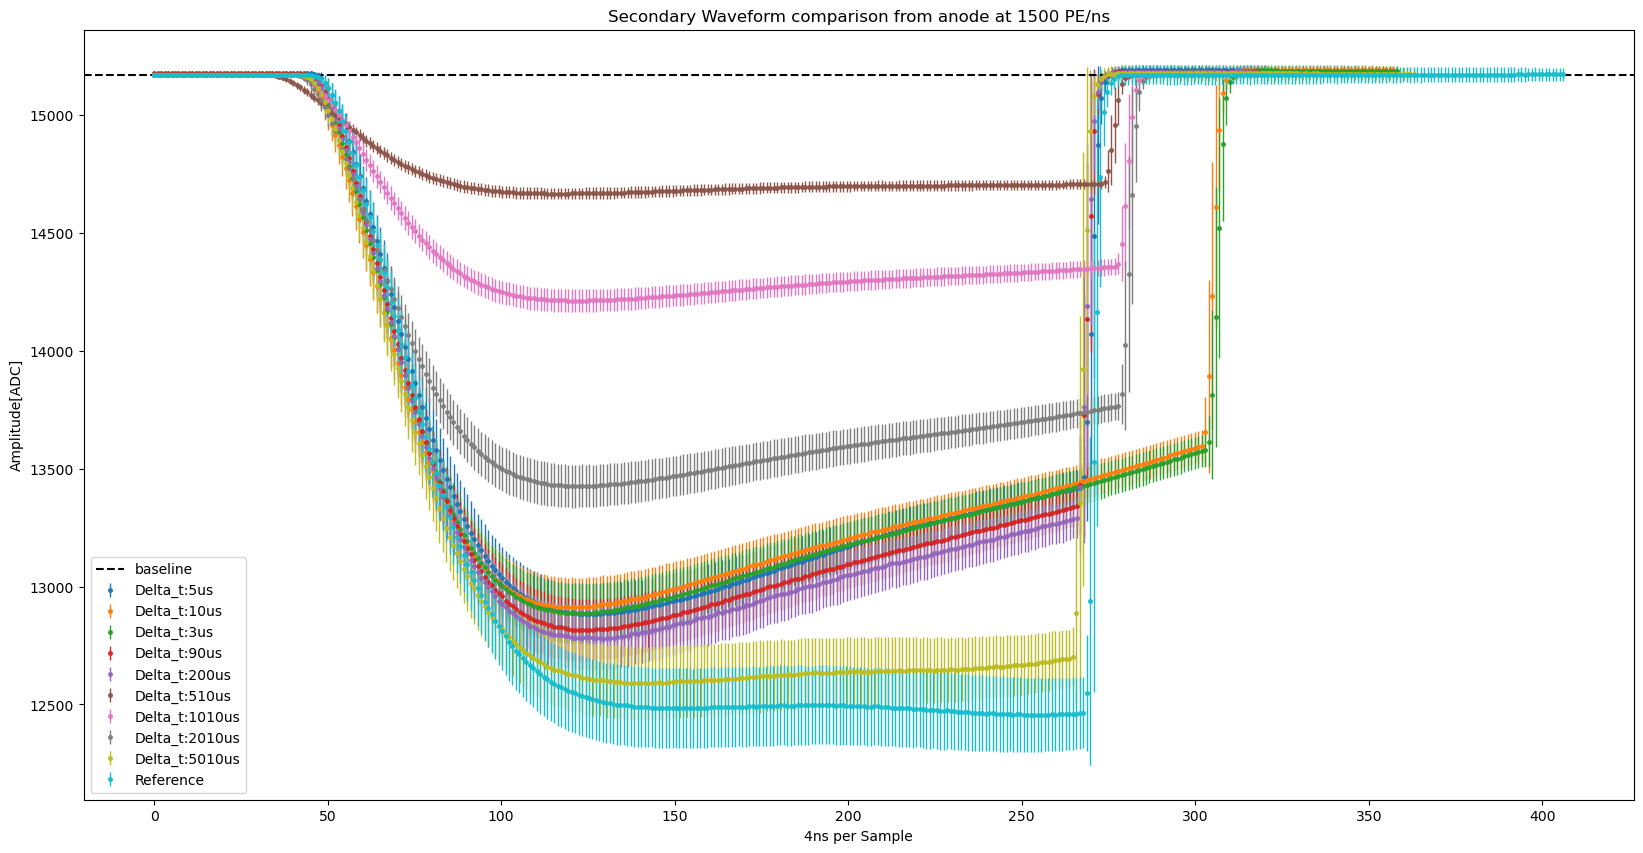

In [122]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')
from matplotlib.colors import ListedColormap
rainbow_colors = [
    "#FF0000",  # 红色
    "#FFA500",  # 橙色
    "#FFFF00",  # 黄色
    "#00BFFF",  # 天蓝色
    "#008B8B",  # 草绿色
    "#8B4513",  # 褐色（或您可以选择其他颜色）
    "#A9A9A9"   # 灰色（或更多颜色）
]
rainbow_cmap = ListedColormap(rainbow_colors)
fig, ax = plt.subplots(figsize=(20,10))
# plt.step(np.arange(len(mean_array[:500])), mean_array[:500], where='mid', label='', color='r')
x = np.linspace(0, len(mea_5us), len(mea_5us)) 
ax.errorbar(x, mea_5us, yerr=std_5us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(0),  label='Delta_t:5us')
x = np.linspace(0, len(mea_10us), len(mea_10us)) 
ax.errorbar(x, mea_10us, yerr=std_10us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(1),  label='Delta_t:10us')
x = np.linspace(0, len(mea_30us), len(mea_30us)) 
ax.errorbar(x, mea_30us, yerr=std_30us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(2),  label='Delta_t:3us') 
x = np.linspace(0, len(mea_90us), len(mea_90us)) 
ax.errorbar(x, mea_90us, yerr=std_90us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(3),  label='Delta_t:90us') 
x = np.linspace(0, len(mea_200us), len(mea_200us)) 
ax.errorbar(x, mea_200us, yerr=std_200us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(4), label='Delta_t:200us') 
x = np.linspace(0, len(mea_510us), len(mea_510us)) 
ax.errorbar(x, mea_510us, yerr=std_510us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(5),  label='Delta_t:510us') 
x = np.linspace(0, len(mea_1010us), len(mea_1010us)) 
ax.errorbar(x, mea_1010us, yerr=std_1010us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(6),  label='Delta_t:1010us') 
x = np.linspace(0, len(mea_2010us), len(mea_2010us)) 
ax.errorbar(x, mea_2010us, yerr=std_2010us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(7),  label='Delta_t:2010us') 
x = np.linspace(0, len(mea_5010us), len(mea_5010us)) 
ax.errorbar(x, mea_5010us, yerr=std_5010us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(8),  label='Delta_t:5010us') 
x = np.linspace(0, len(mea_ref), len(mea_ref)) 
ax.errorbar(x, mea_ref, yerr=std_ref, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(9),  label='Reference')
ax.set_xlabel('4ns per Sample')
ax.set_ylabel('Amplitude[ADC]')
ax.set_title('Secondary Waveform comparison from anode at 1500 PE/ns')
plt.axhline(y=df.Baseline[:][0], color='black', linestyle='--', label='baseline')  
plt.legend(loc='lower left')
plt.savefig(r'./figs/S2_waveform_comparison_anode_1p9V_20241119.png',dpi=300)
plt.show()

In [20]:
import pandas as pd
import numpy as np
import glob
import analysis_data
def calculate_ch0_mean_std(file, threshold=100, start_index=1000, end_index=None ):
    h5_files_pattern = r'{}*.h5py'.format(file.split('raw_')[0])
    print(h5_files_pattern)
    h5_files = glob.glob(h5_files_pattern)
    df = pd.DataFrame()  #### comine all data
    for files in h5_files:
        _df = pd.read_hdf(files, key='winfo')
        df = pd.concat([df, _df], ignore_index=True)
    # df = pd.read_hdf(file, key='winfo')
    index = None
    for i in range(3):
        if df.Ch[i] != 0:
            continue
        else:
            index = i
        index = i
    ch_selec = df.Ch == 0
    df = df[ch_selec]
    if 'Wave' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'Wave' column.")
    
    st, ed = analysis_data.find_threshold_points(df.Wave[:][index], df.Baseline[:][index], negative_pulse=True, threshold=threshold, start_index=start_index, end_index=len(df.Wave[:][index]) )
    
    wave_array = df['Wave'].values 
    data_array = np.zeros((len(wave_array), len(wave_array[0])))
    for i in range(len(wave_array)):
        for j in range(len(wave_array[0])):
            data_array[i][j] = wave_array[i][j]        
    mean_array = np.mean(data_array, axis=0)
    std_array = np.std(data_array, axis=0)
    data_array = None
    return mean_array[st-50:ed+50], std_array[st-50:ed+50]

In [11]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_5us_50hz_run0_raw_b0_seg0.h5py'
mea_5us, std_5us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)
# df = pd.read_hdf(file, key='winfo')
# df.head()


In [13]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_10us_50hz_run0_raw_b0_seg0.h5py'
mea_10us, std_10us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [16]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_30us_50hz_run0_raw_b0_seg0.h5py'
mea_30us, std_30us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

In [ ]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_90us_50hz_run0_raw_b0_seg0.h5py'
# file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_90us_50hz_run0_raw_b0_seg0.h5py'
mea_90us, std_90us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_90us_50hz_run0_*.h5py


In [22]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_200us_50hz_run0_raw_b0_seg0.h5py'
mea_200us, std_200us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_200us_50hz_run0_*.h5py


In [38]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_1ms_20hz_run0_raw_b0_seg0.h5py'
mea_1ms, std_1ms = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_1ms_20hz_run0_*.h5py


In [33]:
file  = 'outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_2ms_20hz_run0_raw_b0_seg0.h5py'
mea_2ms, std_2ms = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241122_12DB_LED_combine_1.26v_0.92v_0.76v_1p69_1p35_2ms_20hz_run0_*.h5py


In [45]:
file = 'outnpy/lv2415_lv2414_20241122_12DB_LED_1p35_1us_500hz_ref_run0_raw_b0_seg0.h5py'
mea_ref, std_ref = calculate_ch0_mean_std(file, threshold=100, start_index=10)

outnpy/lv2415_lv2414_20241122_12DB_LED_1p35_1us_500hz_ref_run0_*.h5py


/tmp/ipykernel_3063907/1721839978.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


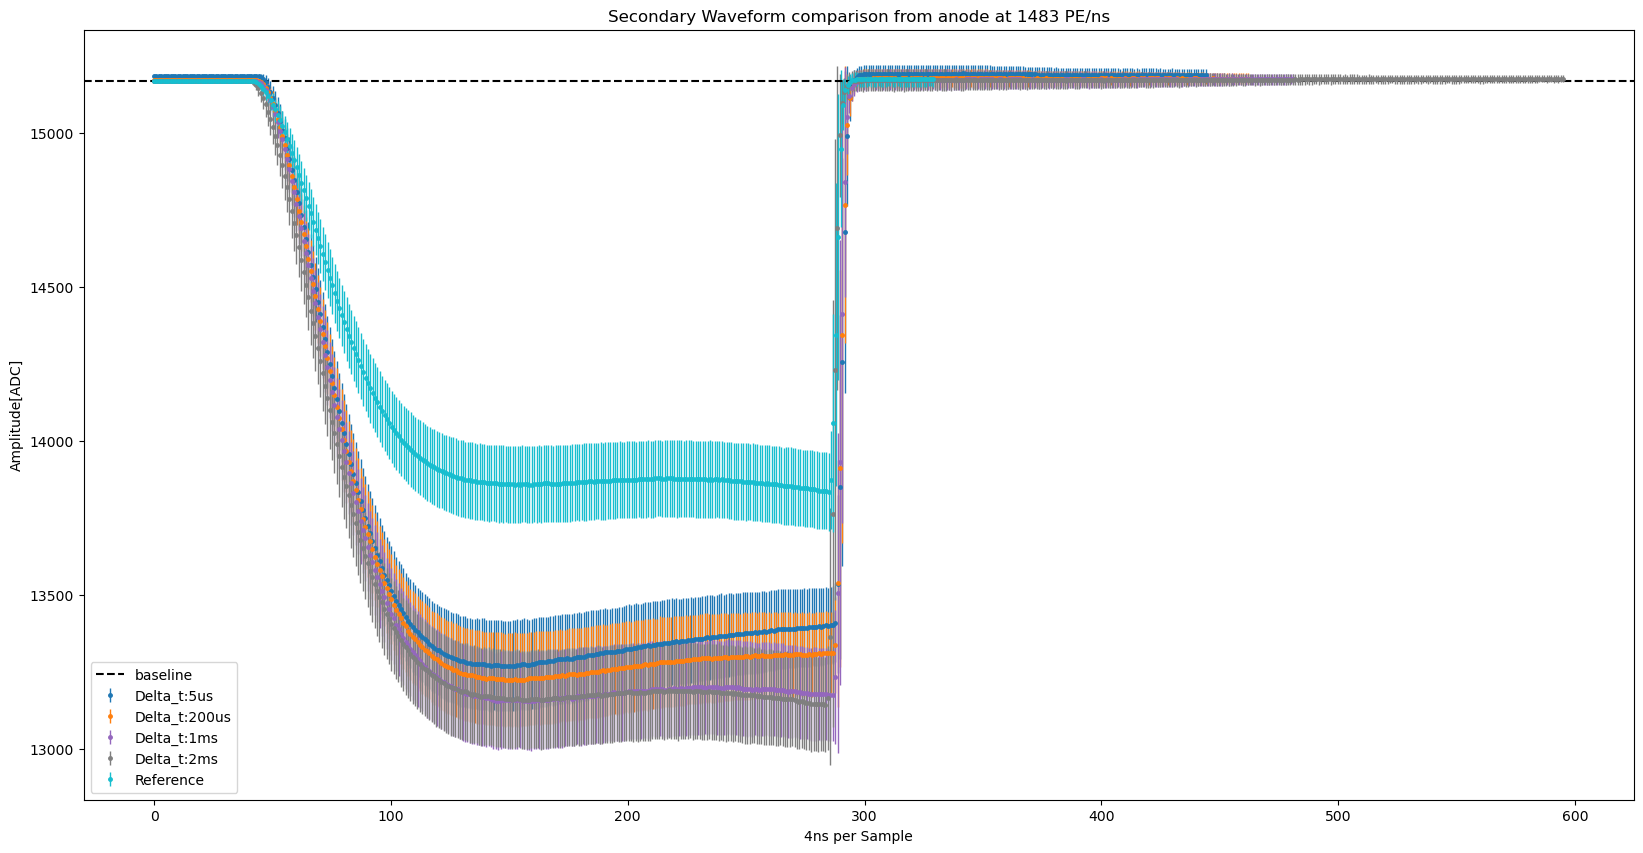

In [47]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')
# from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, len(mea_5us), len(mea_5us)) 
ax.errorbar(x, mea_5us, yerr=std_5us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(0),  label='Delta_t:5us')
# x = np.linspace(0, len(mea_10us), len(mea_10us)) 
# ax.errorbar(x, mea_10us, yerr=std_10us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(1),  label='Delta_t:10us')
# x = np.linspace(0, len(mea_30us), len(mea_30us)) 
# ax.errorbar(x, mea_30us, yerr=std_30us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(2),  label='Delta_t:30us') 
# x = np.linspace(0, len(mea_90us), len(mea_90us)) 
# ax.errorbar(x, mea_90us, yerr=std_90us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(3),  label='Delta_t:90us') 
x = np.linspace(0, len(mea_200us), len(mea_200us)) 
ax.errorbar(x, mea_200us, yerr=std_200us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(1), label='Delta_t:200us') 
# x = np.linspace(0, len(mea_510us), len(mea_510us)) 
# ax.errorbar(x, mea_510us, yerr=std_510us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(5),  label='Delta_t:510us') 
# x = np.linspace(0, len(mea_1010us), len(mea_1010us)) 
# ax.errorbar(x, mea_1010us, yerr=std_1010us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(6),  label='Delta_t:1010us') 
# x = np.linspace(0, len(mea_2010us), len(mea_2010us)) 
# ax.errorbar(x, mea_2010us, yerr=std_2010us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(7),  label='Delta_t:2010us') 
# x = np.linspace(0, len(mea_5010us), len(mea_5010us)) 
# ax.errorbar(x, mea_5010us, yerr=std_5010us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(8),  label='Delta_t:5010us') 

x = np.linspace(0, len(mea_1ms), len(mea_1ms)) 
ax.errorbar(x, mea_1ms, yerr=std_1ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(4),  label='Delta_t:1ms') 
x = np.linspace(0, len(mea_2ms), len(mea_2ms)) 
ax.errorbar(x, mea_2ms, yerr=std_2ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(7),  label='Delta_t:2ms') 
x = np.linspace(0, len(mea_ref), len(mea_ref)) 
ax.errorbar(x, mea_ref, yerr=std_ref, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(10),  label='Reference')
ax.set_xlabel('4ns per Sample')
ax.set_ylabel('Amplitude[ADC]')
ax.set_title('Secondary Waveform comparison from anode at 1483 PE/ns')
plt.axhline(y=df.Baseline[:][0], color='black', linestyle='--', label='baseline')  
plt.legend(loc='lower left')
plt.savefig(r'./figs/S2_waveform_comparison_anode_1p9V_20241122.png',dpi=300)
plt.show()

In [1]:
import pandas as pd
import numpy as np
import glob
import analysis_data
def calculate_ch0_mean_std(file, threshold=100, start_index=1000, end_index=None ):
    h5_files_pattern = r'{}*.h5py'.format(file.split('raw_')[0])
    print(h5_files_pattern)
    h5_files = glob.glob(h5_files_pattern)
    df = pd.DataFrame()  #### comine all data
    for files in h5_files:
        _df = pd.read_hdf(files, key='winfo')
        df = pd.concat([df, _df], ignore_index=True)
    # df = pd.read_hdf(file, key='winfo')
    index = None
    for i in range(3):
        if df.Ch[i] != 0:
            continue
        else:
            index = i
        index = i
    ch_selec = df.Ch == 0
    df = df[ch_selec]
    if 'Wave' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'Wave' column.")
    
    st, ed = analysis_data.find_threshold_points(df.Wave[:][index], df.Baseline[:][index], negative_pulse=True, threshold=threshold, start_index=start_index, end_index=len(df.Wave[:][index]) )
    
    wave_array = df['Wave'].values 
    # data_array = np.zeros((len(wave_array), (ed+50 - (st-50))))
    data_array = np.zeros((len(wave_array), len(wave_array[0])))
    for i in range(len(wave_array)):
        for j in range(len(wave_array[0])):
            data_array[i][j] = wave_array[i][j]        
    mean_array = np.mean(data_array, axis=0)
    std_array = np.std(data_array, axis=0)
    data_array = None
    return mean_array[st-50:ed+50], std_array[st-50:ed+50]

In [7]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_5us_50hz_run0_raw_b0_seg0.h5df'
mea_5us, std_5us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_5us_50hz_run0_*.h5py


In [3]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_90us_50hz_run0_raw_b0_seg0.h5py'
mea_90us, std_90us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_90us_50hz_run0_*.h5py


In [4]:
file  = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_200us_50hz_run0_raw_b0_seg0.h5py'
mea_200us, std_200us = calculate_ch0_mean_std(file, threshold=100, start_index=50000)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_200us_50hz_run0_*.h5py


In [5]:
file  = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_1ms_20hz_run0_raw_b0_seg0.h5p'
mea_1ms, std_1ms = calculate_ch0_mean_std(file, threshold=100, start_index=250000)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_1ms_20hz_run0_*.h5py


In [10]:
# file  = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_5ms_5hz_run0_raw_b0_seg0.h5py'
# mea_5ms, std_5ms = calculate_ch0_mean_std(file, threshold=100, start_index=1250000)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1.43v_0.80v_0.84v_1p995_1p365_5ms_5hz_run0_*.h5py


: 

/tmp/ipykernel_2717948/1987344404.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


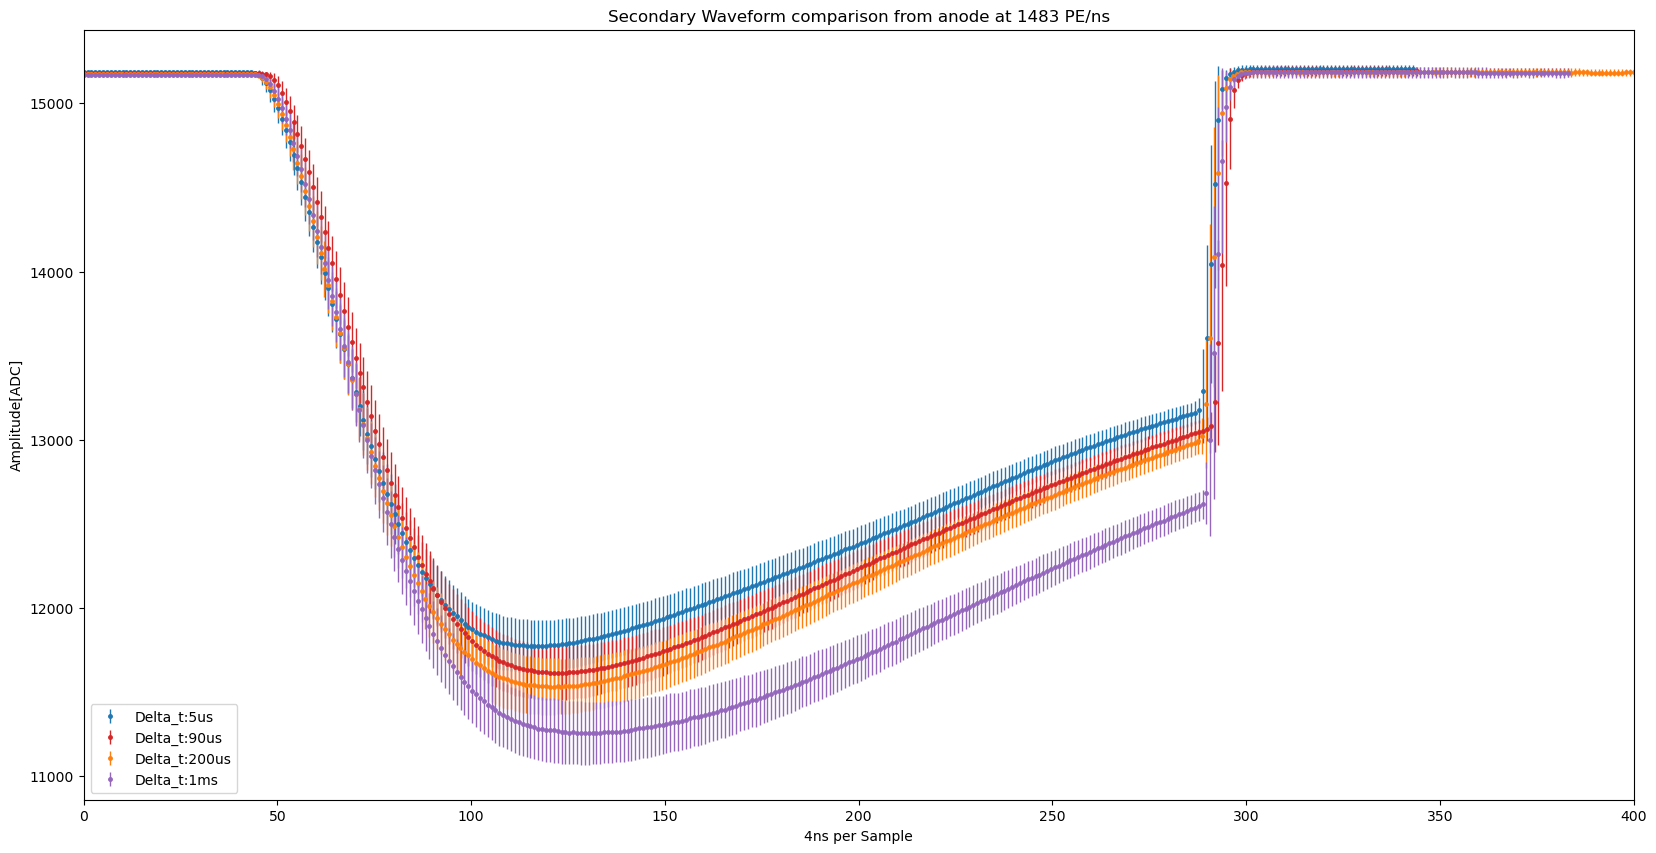

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')
# from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, len(mea_5us), len(mea_5us)) 
ax.errorbar(x, mea_5us, yerr=std_5us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(0),  label='Delta_t:5us')
# x = np.linspace(0, len(mea_10us), len(mea_10us)) 
# ax.errorbar(x, mea_10us, yerr=std_10us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(1),  label='Delta_t:10us')
# x = np.linspace(0, len(mea_30us), len(mea_30us)) 
# ax.errorbar(x, mea_30us, yerr=std_30us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(2),  label='Delta_t:30us') 
x = np.linspace(0, len(mea_90us), len(mea_90us)) 
ax.errorbar(x, mea_90us, yerr=std_90us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(3),  label='Delta_t:90us') 
x = np.linspace(0, len(mea_200us), len(mea_200us)) 
ax.errorbar(x, mea_200us, yerr=std_200us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(1), label='Delta_t:200us') 
x = np.linspace(0, len(mea_1ms), len(mea_1ms)) 
ax.errorbar(x, mea_1ms, yerr=std_1ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(4),  label='Delta_t:1ms') 
# x = np.linspace(0, len(mea_5ms), len(mea_5ms)) 
# ax.errorbar(x, mea_5ms, yerr=std_5ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(7),  label='Delta_t:5ms') 
# x = np.linspace(0, len(mea_ref), len(mea_ref)) 
# ax.errorbar(x, mea_ref, yerr=std_ref, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(10),  label='Reference')
ax.set_xlabel('4ns per Sample')
ax.set_ylabel('Amplitude[ADC]')
ax.set_title('Secondary Waveform comparison from anode at 3000 PE/ns')
ax.set_xlim(0,400)
# plt.axhline(y=df.Baseline[:][0], color='black', linestyle='--', label='baseline')  
plt.legend(loc='lower left')
# plt.savefig(r'./figs/S2_waveform_comparison_anode_1p9V_20241125.png',dpi=300)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import glob
import analysis_data
def calculate_ch0_mean_std(file, threshold=100, start_index=1000, end_index=None ):
    h5_files_pattern = r'{}*.h5py'.format(file.split('raw_')[0])
    print(h5_files_pattern)
    h5_files = glob.glob(h5_files_pattern)
    df = pd.DataFrame()  #### comine all data
    for files in h5_files:
        _df = pd.read_hdf(files, key='winfo')
        df = pd.concat([df, _df], ignore_index=True)
    # df = pd.read_hdf(file, key='winfo')
    index = None
    for i in range(3):
        if df.Ch[i] != 0:
            continue
        else:
            index = i
        index = i
    ch_selec = df.Ch == 0
    df = df[ch_selec]
    if 'Wave' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'Wave' column.")
    
    st, ed = analysis_data.find_threshold_points(df.Wave[:][index], df.Baseline[:][index], negative_pulse=True, threshold=threshold, start_index=start_index, end_index=len(df.Wave[:][index]) )
    
    wave_array = df['Wave'].values 
    # data_array = np.zeros((len(wave_array), (ed+50 - (st-50))))
    data_array = np.zeros((len(wave_array), len(wave_array[0])))
    for i in range(len(wave_array)):
        for j in range(len(wave_array[0])):
            data_array[i][j] = wave_array[i][j]        
    mean_array = np.mean(data_array, axis=0)
    std_array = np.std(data_array, axis=0)
    data_array = None
    return mean_array[st-50:ed+50], std_array[st-50:ed+50]

In [11]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_5us_50hz_run0_raw_b0_seg0.h5py'
mea_5us, std_5us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_5us_50hz_run0_*.h5py


In [14]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_90us_50hz_run0_raw_b0_seg0.h5py'
mea_90us, std_90us = calculate_ch0_mean_std(file, threshold=100, start_index=80)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_90us_50hz_run0_*.h5py


In [16]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_200us_50hz_run0_raw_b0_seg0.h5py'
mea_200us, std_200us = calculate_ch0_mean_std(file, threshold=100, start_index=80)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_200us_50hz_run0_*.h5py


In [17]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_1ms_50hz_run0_raw_b0_seg0.h5py'
mea_1ms, std_1ms = calculate_ch0_mean_std(file, threshold=100, start_index=80)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_1ms_50hz_run0_*.h5py


In [18]:
file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_10ms_50hz_run0_raw_b0_seg0.h5py'
mea_10ms, std_10ms = calculate_ch0_mean_std(file, threshold=100, start_index=80)

outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_10ms_50hz_run0_*.h5py


/tmp/ipykernel_2717948/1690111986.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


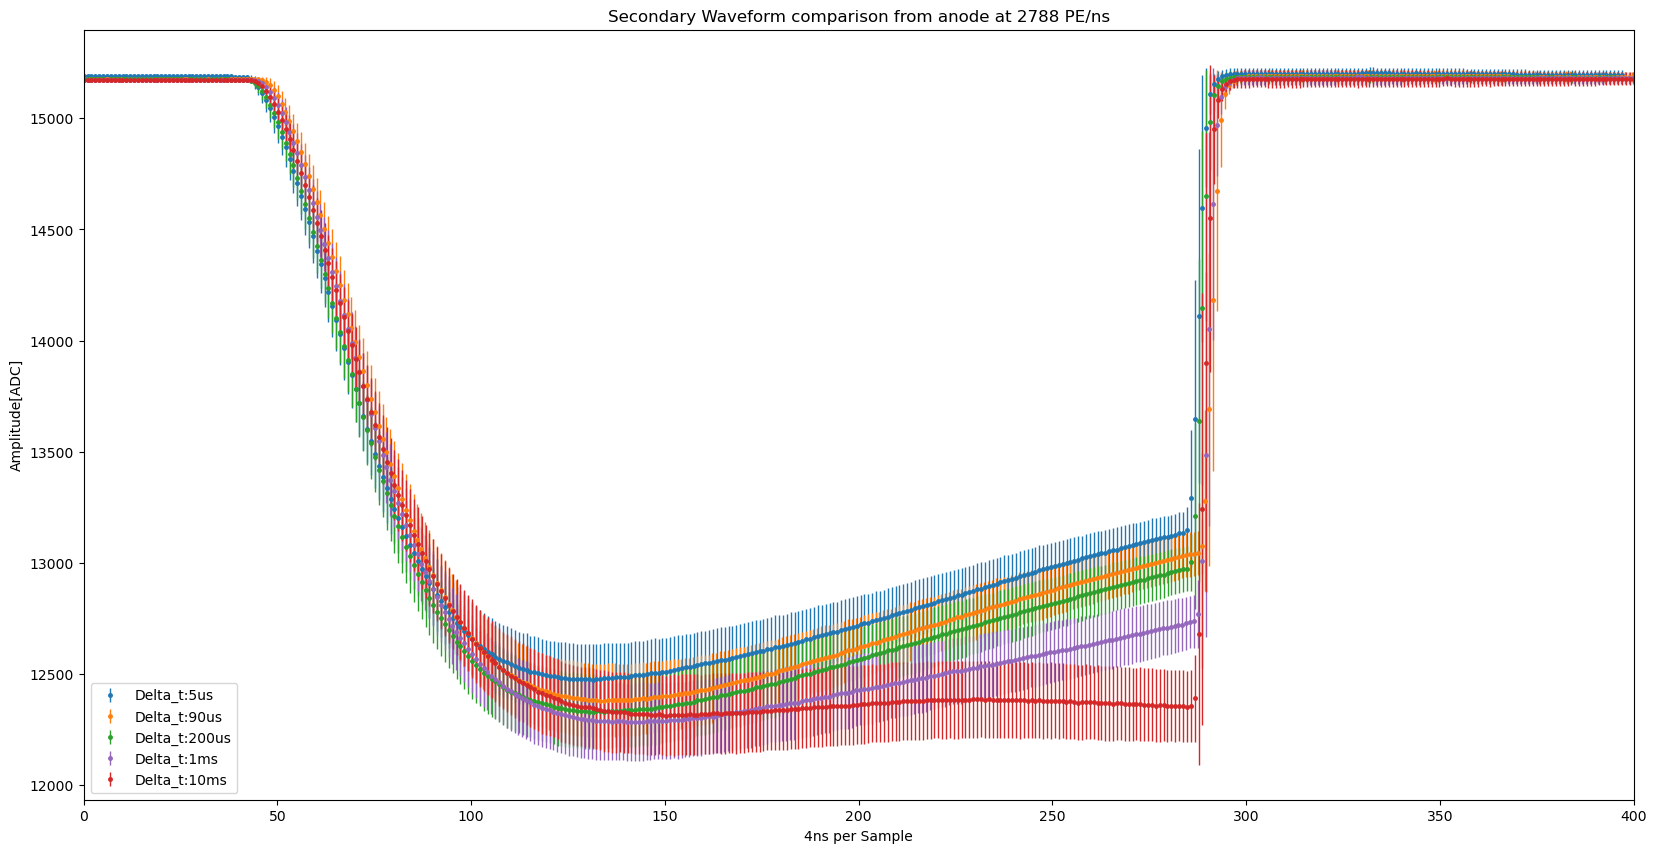

In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')
# from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, len(mea_5us), len(mea_5us)) 
ax.errorbar(x, mea_5us, yerr=std_5us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(0),  label='Delta_t:5us')
x = np.linspace(0, len(mea_90us), len(mea_90us)) 
ax.errorbar(x, mea_90us, yerr=std_90us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(1),  label='Delta_t:90us') 
x = np.linspace(0, len(mea_200us), len(mea_200us)) 
ax.errorbar(x, mea_200us, yerr=std_200us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(2), label='Delta_t:200us') 
x = np.linspace(0, len(mea_1ms), len(mea_1ms)) 
ax.errorbar(x, mea_1ms, yerr=std_1ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(4),  label='Delta_t:1ms') 
x = np.linspace(0, len(mea_10ms), len(mea_10ms)) 
ax.errorbar(x, mea_10ms, yerr=std_10ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(3),  label='Delta_t:10ms') 
# x = np.linspace(0, len(mea_ref), len(mea_ref)) 
# ax.errorbar(x, mea_ref, yerr=std_ref, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(10),  label='Reference')
ax.set_xlabel('4ns per Sample')
ax.set_ylabel('Amplitude[ADC]')
ax.set_title('Secondary Waveform comparison from anode at 2788 PE/ns')
ax.set_xlim(0,400)
# plt.axhline(y=df.Baseline[:][0], color='black', linestyle='--', label='baseline')  
plt.legend(loc='lower left')
# plt.savefig(r'./figs/S2_waveform_comparison_anode_1p9V_20241126.png',dpi=300)
plt.show()

In [5]:
import pandas as pd
import numpy as np
import glob
import analysis_data
def calculate_ch0_mean_std(file, threshold=100, start_index=1000, end_index=None):  # , Channel='Anode'):
    h5_files_pattern = r'{}*.h5py'.format(file.split('raw_')[0])
    print(h5_files_pattern)
    h5_files = glob.glob(h5_files_pattern)
    df = pd.DataFrame()  #### comine all data
    for files in h5_files:
        _df = pd.read_hdf(files, key='winfo')
        df = pd.concat([df, _df], ignore_index=True)
    # df = pd.read_hdf(file, key='winfo')
    index = None 
    for i in range(3):
        if df.Ch[i] != 0:
            continue
        else:
            index = i
        index = i
    ch_selec = df.Ch == 0
    '''
    # if Channel =='Anode':
    # ch_selec = df.Ch == 0
    # elif Channel =='Dynode':
        for i in range(3):
            if df.Ch[i] != 0:
                continue
            else:
                index = i
        index = i
        ch_selec = df.Ch == 2        
    '''
    df = df[ch_selec]
    if 'Wave' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'Wave' column.")
    
    st, ed = analysis_data.find_threshold_points(df.Wave[:][index], df.Baseline[:][index], negative_pulse=True, threshold=threshold, start_index=start_index, end_index=len(df.Wave[:][index]) )
    
    wave_array = df['Wave'].values 
    # data_array = np.zeros((len(wave_array), (ed+50 - (st-50))))
    data_array = np.zeros((len(wave_array), len(wave_array[0])))
    for i in range(len(wave_array)):
        for j in range(len(wave_array[0])):
            data_array[i][j] = wave_array[i][j]        
    mean_array = np.mean(data_array, axis=0)
    std_array = np.std(data_array, axis=0)
    data_array = None
    return mean_array[st-50:ed+50], std_array[st-50:ed+50]

In [7]:
import sys
# argvs = sys.argv
# file_list =  sys.argv[1] 

time_delay_map = {'5us':5, '200us':200, '1ms':1000, '10ms':10000}  ## time delay unit on 'us'
# file_list = 'npylist'
file_list = 'npylist_1p6'
led_config = ''
with open(file_list, 'r') as list:
    for line in list: 
        file = line.rstrip('\n')
        time_space=file.split('680mv_')[1].split('_50hz')[0]
        led_config=file.split('combine_')[0]+'combine_'+file.split('combine_')[1].split('680mv_')[0]+'680mv_'
        # file = 'outnpy/lv2415_lv2414_20241125_12DB_LED_combine_1p9v_950mv_1p36v_680mv_5us_50hz_run0_raw_b0_seg0.h5py'
        if time_space == '5us':
            mea_5us, std_5us = calculate_ch0_mean_std(file, threshold=100, start_index=1000)
        elif time_space == '200us' :
            mea_200us, std_200us = calculate_ch0_mean_std(file, threshold=100, start_index=80)
        elif time_space == '1ms' :
            mea_1ms, std_1ms = calculate_ch0_mean_std(file, threshold=100, start_index=80)
        elif time_space == '10ms' :
            mea_10ms, std_10ms = calculate_ch0_mean_std(file, threshold=100, start_index=80)    
            
# print(led_config)  
            

outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_10ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_1ms_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_200us_50hz_run0_*.h5py
outnpy/lv2415_lv2414_20241126_12DB_LED_combine_1p6v_800mv_1p36v_680mv_5us_50hz_run0_*.h5py


/tmp/ipykernel_2598763/2367792501.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


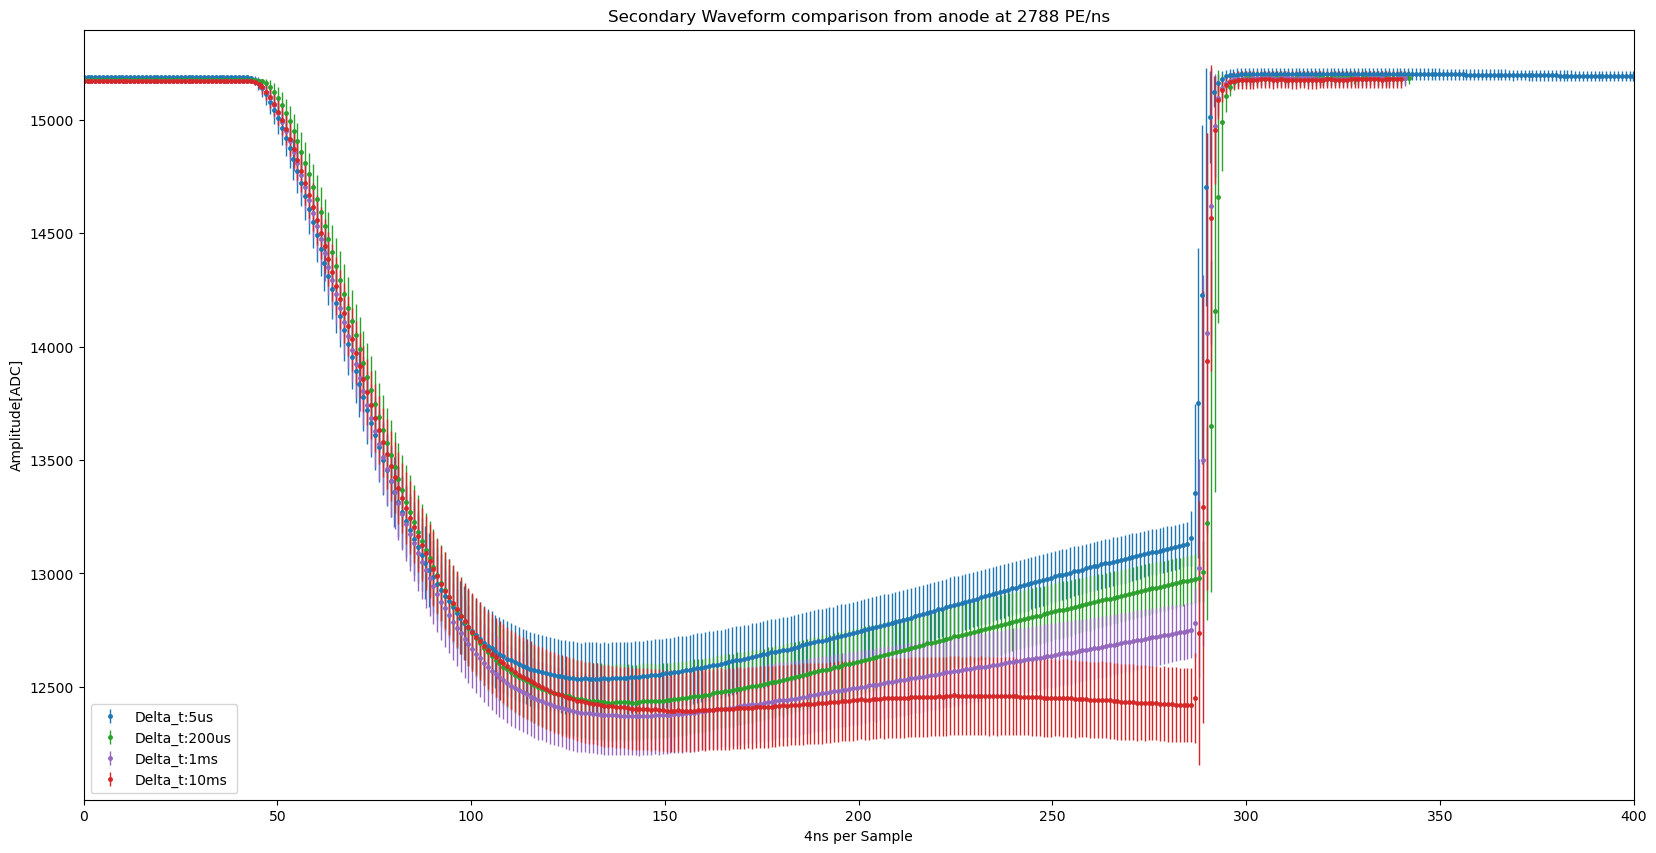

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')
# from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, len(mea_5us), len(mea_5us)) 
ax.errorbar(x, mea_5us, yerr=std_5us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(0),  label='Delta_t:5us')
x = np.linspace(0, len(mea_200us), len(mea_200us)) 
ax.errorbar(x, mea_200us, yerr=std_200us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(2), label='Delta_t:200us') 
x = np.linspace(0, len(mea_1ms), len(mea_1ms)) 
ax.errorbar(x, mea_1ms, yerr=std_1ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(4),  label='Delta_t:1ms') 
x = np.linspace(0, len(mea_10ms), len(mea_10ms)) 
ax.errorbar(x, mea_10ms, yerr=std_10ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(3),  label='Delta_t:10ms') 
# x = np.linspace(0, len(mea_ref), len(mea_ref)) 
# ax.errorbar(x, mea_ref, yerr=std_ref, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(10),  label='Reference')
ax.set_xlabel('4ns per Sample')
ax.set_ylabel('Amplitude[ADC]')
ax.set_title('Secondary Waveform comparison from anode at 2788 PE/ns')
ax.set_xlim(0,400)
# plt.axhline(y=df.Baseline[:][0], color='black', linestyle='--', label='baseline')  
plt.legend(loc='lower left')
plt.savefig(r'./figs/{}_S2_wf_anode.png'.format(led_config.split('lv2414_')[1]),dpi=300)
plt.show()

/tmp/ipykernel_4002565/2367792501.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('tab10')


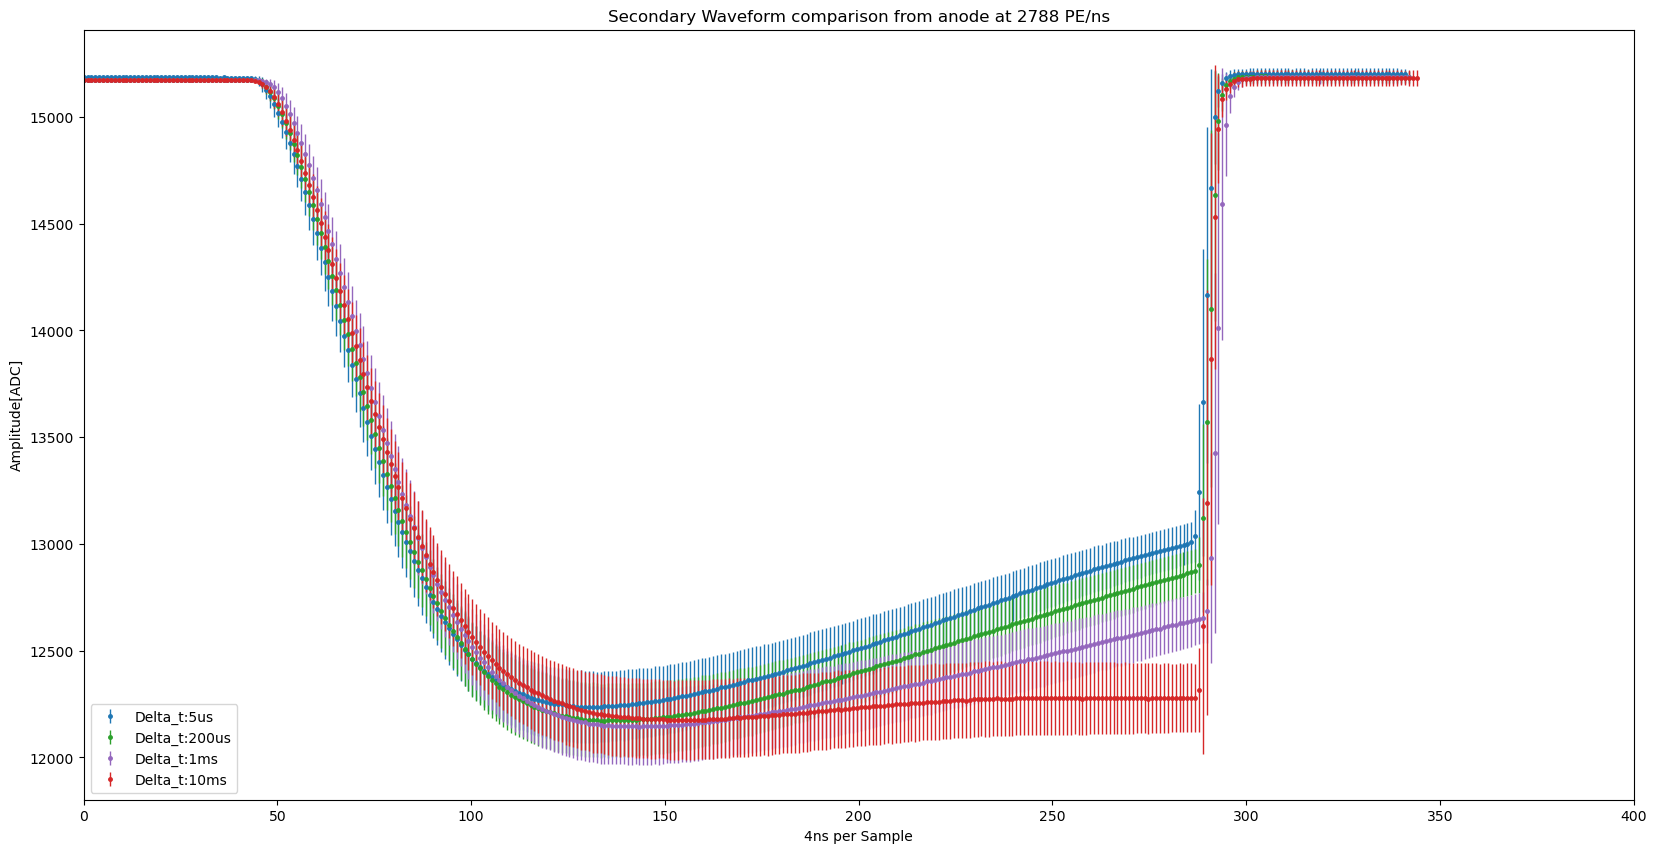

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('tab10')
# from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0, len(mea_5us), len(mea_5us)) 
ax.errorbar(x, mea_5us, yerr=std_5us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(0),  label='Delta_t:5us')
x = np.linspace(0, len(mea_200us), len(mea_200us)) 
ax.errorbar(x, mea_200us, yerr=std_200us, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(2), label='Delta_t:200us') 
x = np.linspace(0, len(mea_1ms), len(mea_1ms)) 
ax.errorbar(x, mea_1ms, yerr=std_1ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(4),  label='Delta_t:1ms') 
x = np.linspace(0, len(mea_10ms), len(mea_10ms)) 
ax.errorbar(x, mea_10ms, yerr=std_10ms, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(3),  label='Delta_t:10ms') 
# x = np.linspace(0, len(mea_ref), len(mea_ref)) 
# ax.errorbar(x, mea_ref, yerr=std_ref, fmt='.',  markersize=5,  capsize=0, elinewidth=1, capthick=1, color=cmap(10),  label='Reference')
ax.set_xlabel('4ns per Sample')
ax.set_ylabel('Amplitude[ADC]')
ax.set_title('Secondary Waveform comparison from anode at 2788 PE/ns')
ax.set_xlim(0,400)
# plt.axhline(y=df.Baseline[:][0], color='black', linestyle='--', label='baseline')  
plt.legend(loc='lower left')
plt.savefig(r'./figs/{}_S2_wf_anode.png'.format(led_config.split('lv2414_')[1]),dpi=300)
plt.show()